<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI/blob/main/ProyectoML/AlgoritmoEvolutivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [2]:
def Plotter(e):

  fig = plt.figure(figsize=(5,5))
  ax = fig.add_subplot(111)
  ax.set_title('{:.0f}'.format(e),fontsize=10)

  return fig,ax

In [3]:
class Robot:

  def __init__(self, f, Id=0):

    self.Id = Id
    self.f = f

    self.r = np.random.uniform(-10,10)

  def __repr__(self):
    return f"Robot {self.Id}"

In [4]:
def FuncionMinimizar(x):
  return np.sin(x)

In [6]:
r = Robot(FuncionMinimizar)
#r.f(np.pi*0.5)

In [7]:
# Queremos guardar los robots en una lista
def GetRobots(N):

  Robots = []

  for i in range(N):
    r = Robot(FuncionMinimizar,i)
    Robots.append(r)

  return Robots

In [8]:
Robots = GetRobots(10)
Robots

[Robot 0,
 Robot 1,
 Robot 2,
 Robot 3,
 Robot 4,
 Robot 5,
 Robot 6,
 Robot 7,
 Robot 8,
 Robot 9]

In [9]:
def Genetic(Robots, epochs=100):

  for e in range(epochs):

     # Plotting stuff
    clear_output(wait=True)
    _,ax = Plotter(e)

    plt.show()

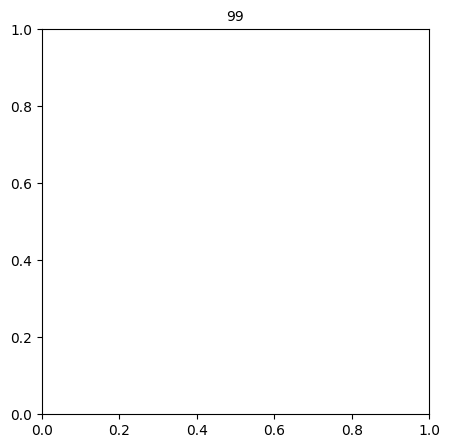

In [10]:
Genetic(Robots)